# <span style="color:green"> *|| DATA SCIENCE PROJECT*</span>
## <span style="color:green"> *|| ANALYSING SALES DATA*</span>
## <span style="color:green"> *|| Date:06/23/2020*</span>

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year of Manu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.97,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2018
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2018
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.53,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2018
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.05,01/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2018
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.38,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2018


In [66]:
df = df.drop(columns=['gross income'])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,Rating,Year of Manu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.97,01/05/2019,13:08,Ewallet,522.83,4.761905,9.1,2018
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,03/08/2019,10:29,Cash,76.40,4.761905,9.6,2018
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.53,03/03/2019,13:23,Credit card,324.31,4.761905,7.4,2018
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.05,01/27/2019,20:33,Ewallet,465.76,4.761905,8.4,2018
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.38,02/08/2019,10:37,Ewallet,604.17,4.761905,5.3,2018


In [67]:
#Column Names Explained

In [68]:
df = df.rename(columns = {'Customer type':'Customer_type', 'Product line':'Product_line', 'Unit price':'Unit_price', 'gross margin percentage':'grossmargin%',
                    'gross income':'gross_income', 'Year of Manu':'Year_of_Manu', 'cogs':'revenue'})

In [69]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'revenue', 'grossmargin%', 'Rating', 'Year_of_Manu'],
      dtype='object')

In [70]:
#Converting the date and time column to datetime format

In [71]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

#   This code formats time column to include hours
#df['Time'] = df['Time'].dt.time

In [72]:
df.head(2)

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,revenue,grossmargin%,Rating,Year_of_Manu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.97,2019-01-05,2020-06-23 13:08:00,Ewallet,522.83,4.761905,9.1,2018
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,2019-03-08,2020-06-23 10:29:00,Cash,76.40,4.761905,9.6,2018


In [73]:
# Checking Datatype

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer_type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product_line   1000 non-null   object        
 6   Unit_price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax 5%         1000 non-null   float64       
 9   Total          1000 non-null   float64       
 10  Date           1000 non-null   datetime64[ns]
 11  Time           1000 non-null   datetime64[ns]
 12  Payment        1000 non-null   object        
 13  revenue        1000 non-null   float64       
 14  grossmargin%   1000 non-null   float64       
 15  Rating         1000 no

In [75]:
# Checking for columns with null values

In [76]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer_type    0
Gender           0
Product_line     0
Unit_price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
revenue          0
grossmargin%     0
Rating           0
Year_of_Manu     0
dtype: int64

In [77]:
# None of the fields have nulls

In [78]:
df.shape

(1000, 17)

In [79]:
# Now let's get rid of duplicate rows:
df2 = df.drop_duplicates()

In [80]:
# Lets check if there were dplicate rows

In [81]:
df2.shape

(1000, 17)

In [82]:
# No duplicates found since the shape of the data remains the same

## <span style="color:red"> *Visualising sales for each Gender*</span>

### <span style="color:red"> *NOTE: 'Total' figure includes tax*</span>

In [83]:
# Analysing the sales revenue for each Gender
df_gen=df[['Gender','Total']]
df_gen_grp= df_gen.groupby('Gender', as_index=False).sum()
df_gen_grp

,Gender,Total
0,Female,167883.26
1,Male,155084.17


Text(0, 0.5, 'Gender')

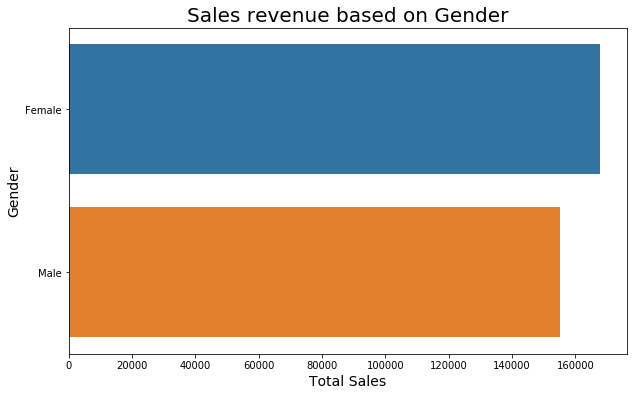

In [84]:
#visualising sales revenue for Gender
plt.figure(figsize=(10,6))
sns.barplot(x='Total',y='Gender',data=df_gen_grp)
plt.title('Sales revenue based on Gender',fontsize=20)
plt.xlabel('Total Sales',fontsize=14)
plt.ylabel('Gender',fontsize=14)




## <span style="color:red"> *Visualising sales revenue for each product line*</span>

In [85]:
#analysing the sales revenue for each product line
df_sal=df[['Product_line','Total']]
df_sal_grp= df_sal.groupby('Product_line', as_index=False).sum()
df_sal_grp

,Product_line,Total
0,Electronic accessories,54337.64
1,Fashion accessories,54306.03
2,Food and beverages,56144.96
3,Health and beauty,49193.84
4,Home and lifestyle,53861.96
5,Sports and travel,55123.00


Text(0, 0.5, 'Product Line')

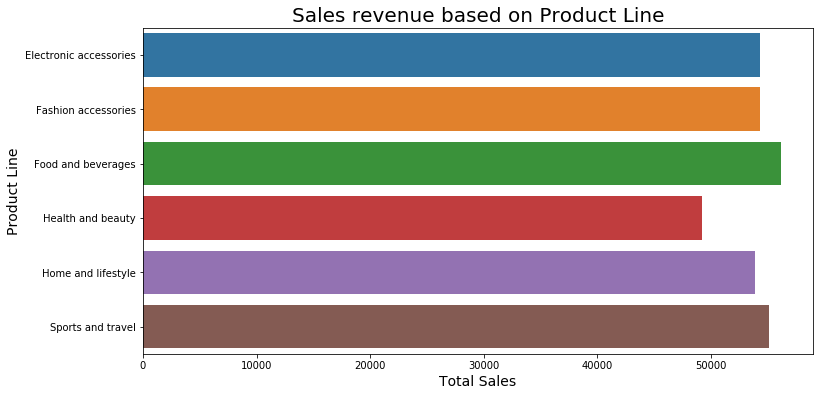

In [86]:
#visualising sales revenue for each product line
plt.figure(figsize=(12,6))
sns.barplot(x='Total',y='Product_line',data=df_sal_grp)
plt.title('Sales revenue based on Product Line',fontsize=20)
plt.xlabel('Total Sales',fontsize=14)
plt.ylabel('Product Line',fontsize=14)

## <span style="color:red"> *Visualising sales revenue based on year of manufacture*</span>

In [87]:
# Analysing the sales revenue per year of manufacture
df_yr=df[['Year_of_Manu','Total']]
df_yr_grp= df_yr.groupby('Year_of_Manu', as_index=False).sum()
df_yr_grp

,Year_of_Manu,Total
0,2017,129404.27
1,2018,193563.16


Text(0, 0.5, 'Year_of_Manu')

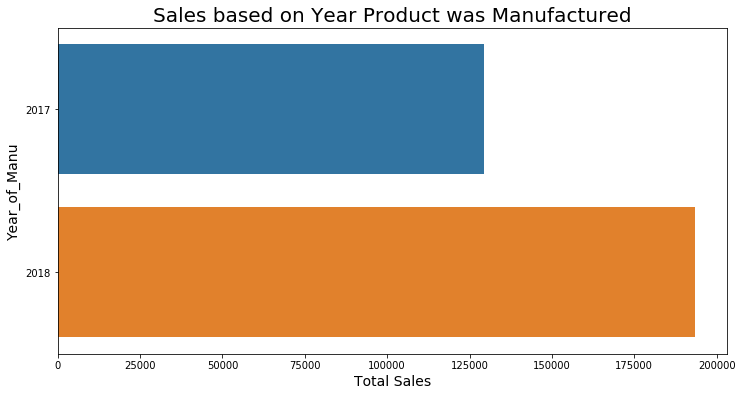

In [88]:
#visualising sales revenue per year of manufacture
plt.figure(figsize=(12,6))
sns.barplot(x='Total',y='Year_of_Manu',data=df_yr_grp, orient = 'h')
plt.title('Sales based on Year Product was Manufactured',fontsize=20)
plt.xlabel('Total Sales',fontsize=14)
plt.ylabel('Year_of_Manu',fontsize=14)

## <span style="color:red"> *Visualizing the Frequesncy of membership status pre product line*</span>

Text(0, 0.5, 'Count')

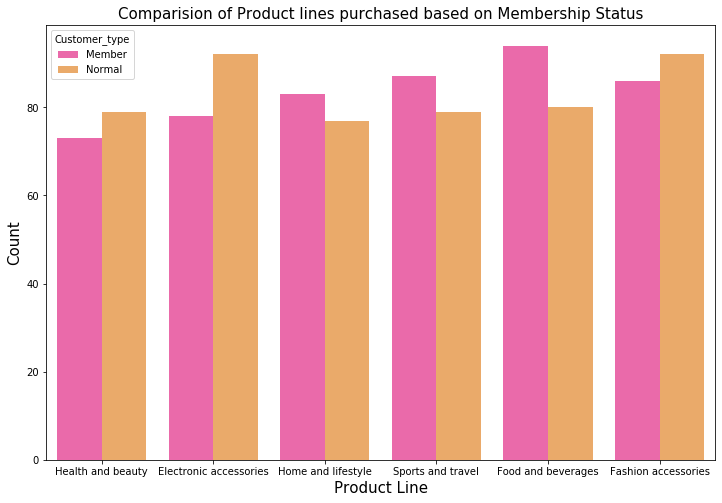

In [89]:
#Comparision of Product lines purchased based Membership Status
plt.figure(figsize=(12,8))
sns.countplot(x='Product_line', hue='Customer_type',data= df, 
              palette='spring')
plt.title('Comparision of Product lines purchased based on Membership Status',fontsize=15)
plt.xlabel('Product Line',fontsize=15)
plt.ylabel('Count',fontsize=15)

## This gives an indication of Customer catogory (be it Members or Non-Members) and the products they purchase

Text(0, 0.5, 'Count')

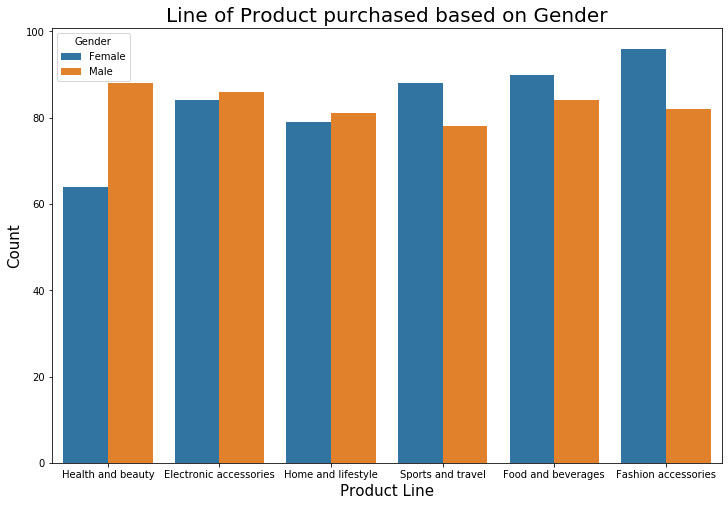

In [90]:
#Comparision of Product lines purchased per on Gender
plt.figure(figsize=(12,8))
sns.countplot(x='Product_line', hue='Gender',data= df)
plt.title('Line of Product purchased based on Gender',fontsize=20)
plt.xlabel('Product Line',fontsize=15)
plt.ylabel('Count',fontsize=15)

In [91]:
#NOTE:
   # dO MORE AVERAGES
   # BOX PLOTS ETC

In [92]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'revenue', 'grossmargin%', 'Rating', 'Year_of_Manu'],
      dtype='object')

## <span style="color:red"> *Correlation between Unit Price and Revenue*</span>

Text(0, 0.5, 'Revenue')

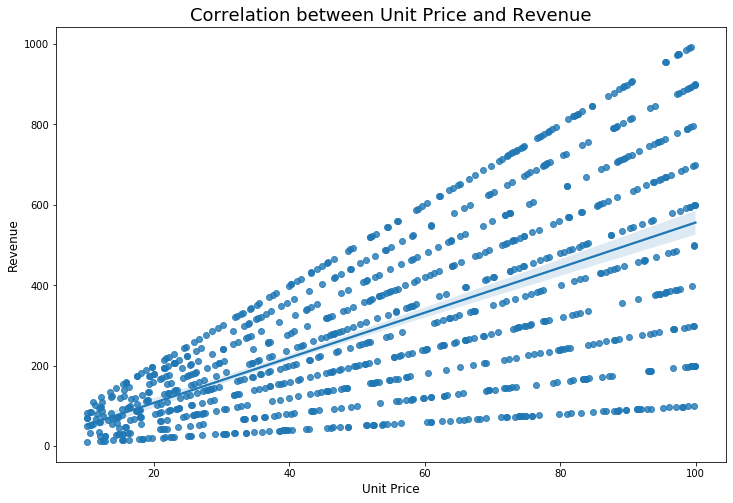

In [93]:
#Correlation between Unit Price and Revenue

plt.figure(figsize=(12,8))
sns.regplot(x='Unit_price',y='revenue',data=df)
plt.title('Correlation between Unit Price and Revenue',fontsize=18)
plt.xlabel('Unit Price',fontsize=12)
plt.ylabel('Revenue',fontsize=12)

### Unit price and Revenue have a positive relationship. As unit price goes up, so does revenue

## <span style="color:red"> *Correlation between Unit Price and Revenue for Sports and travel*</span>

In [94]:
# selecting dataset for sports and travel
df_SnT= df.loc[df['Product_line']=='Sports and travel']
df_SnT.head(2)

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,revenue,grossmargin%,Rating,Year_of_Manu
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.38,2019-02-08,2020-06-23 10:37:00,Ewallet,604.17,4.761905,5.3,2018
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.44,2019-01-15,2020-06-23 16:19:00,Cash,562.32,4.761905,4.5,2018


Text(0, 0.5, 'Revenue (Sports and Travel)')

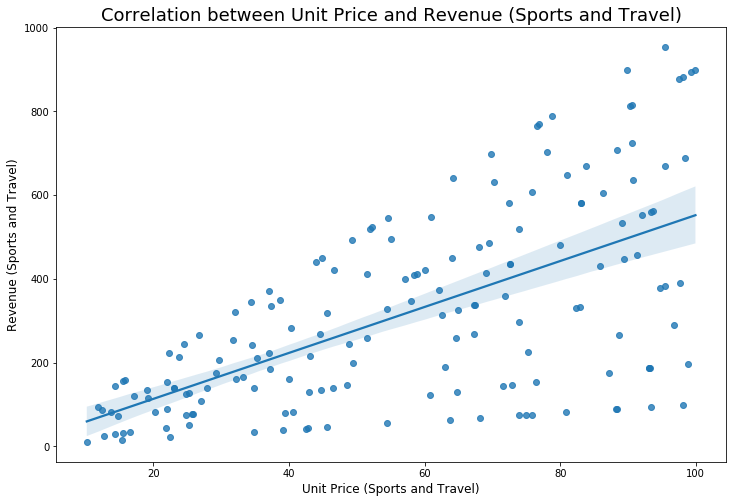

In [95]:
#Correlation between Unit Price and Revenue for Sports and travel

plt.figure(figsize=(12,8))
sns.regplot(x='Unit_price',y='revenue',data=df_SnT)
plt.title('Correlation between Unit Price and Revenue (Sports and Travel)',fontsize=18)
plt.xlabel('Unit Price (Sports and Travel)',fontsize=12)
plt.ylabel('Revenue (Sports and Travel)',fontsize=12)

### Unit price and Revenue for sports and travel have a positive relationship. As unit price goes up, so does revenue

In [96]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'revenue', 'grossmargin%', 'Rating', 'Year_of_Manu'],
      dtype='object')

In [97]:
import statsmodels.api as sm

## <span style="color:red"> *OLS Regression*</span>
### Finding the effect of Unit Price on Revenue

In [98]:
y = df[['revenue']]
x = df[['Unit_price']]

X1 = sm.add_constant(x)

model = sm.OLS(y, X1)

fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     670.6
Date:                Tue, 23 Jun 2020   Prob (F-statistic):          1.61e-113
Time:                        15:00:44   Log-Likelihood:                -6617.5
No. Observations:                1000   AIC:                         1.324e+04
Df Residuals:                     998   BIC:                         1.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3638     13.339     -0.327      0.744     -30.540      21.813
Unit_price     5.6034      0.216     25.897      0.000       5.179       6.028
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.923
Skew:                          -0.022   Prob(JB):                        0.630
Kurtosis:                       2.858   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression Line
## y = -4.36 + 5.6x

### When Unit Price (Independent Variable) increases by 1 dollar, Revenue (Dependent variable) also increases by 5.60 dollars

In [99]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'revenue', 'grossmargin%', 'Rating', 'Year_of_Manu'],
      dtype='object')

In [100]:
prd_ln = df[['City','Product_line', 'revenue']]
prd_ln_grp = prd_ln.groupby(['City','Product_line'], as_index=False).sum()
prd_ln_grp

,City,Product_line,revenue
0,Mandalay,Electronic accessories,16239.47
1,Mandalay,Fashion accessories,15631.73
2,Mandalay,Food and beverages,14490.37
3,Mandalay,Health and beauty,19029.20
4,Mandalay,Home and lifestyle,16713.49
5,Mandalay,Sports and travel,19036.38
6,Naypyitaw,Electronic accessories,18065.69
7,Naypyitaw,Fashion accessories,20533.40
8,Naypyitaw,Food and beverages,22635.10
9,Naypyitaw,Health and beauty,15824.12


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

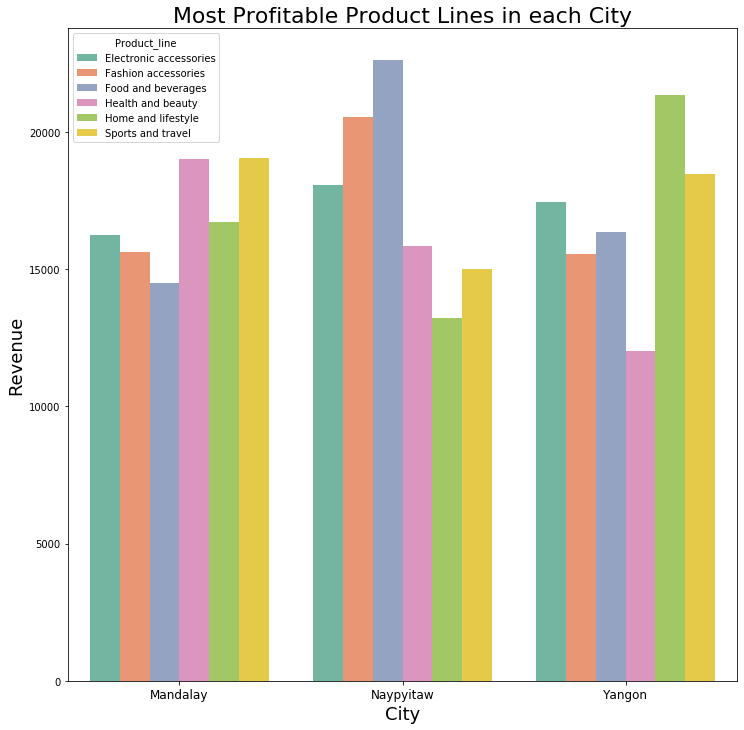

In [101]:
# Visualzing the most profitable product line per city
plt.figure(figsize=(12,12))
sns.barplot(x='City',y='revenue',hue='Product_line',
           data= prd_ln_grp, palette='Set2')
plt.title('Most Profitable Product Lines in each City',fontsize=22)
plt.xlabel('City',fontsize=18)
plt.ylabel('Revenue',fontsize=18)
plt.xticks(fontsize=12)

In [102]:
df_gen = df[['City','Gender', 'revenue']]
df_gen_grp = df_gen.groupby(['City','Gender'], as_index=False).sum()
df_gen_grp

,City,Gender,revenue
0,Mandalay,Female,50407.90
1,Mandalay,Male,50732.74
2,Naypyitaw,Female,58748.06
3,Naypyitaw,Male,46555.47
4,Yangon,Female,50732.54
5,Yangon,Male,50410.67


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

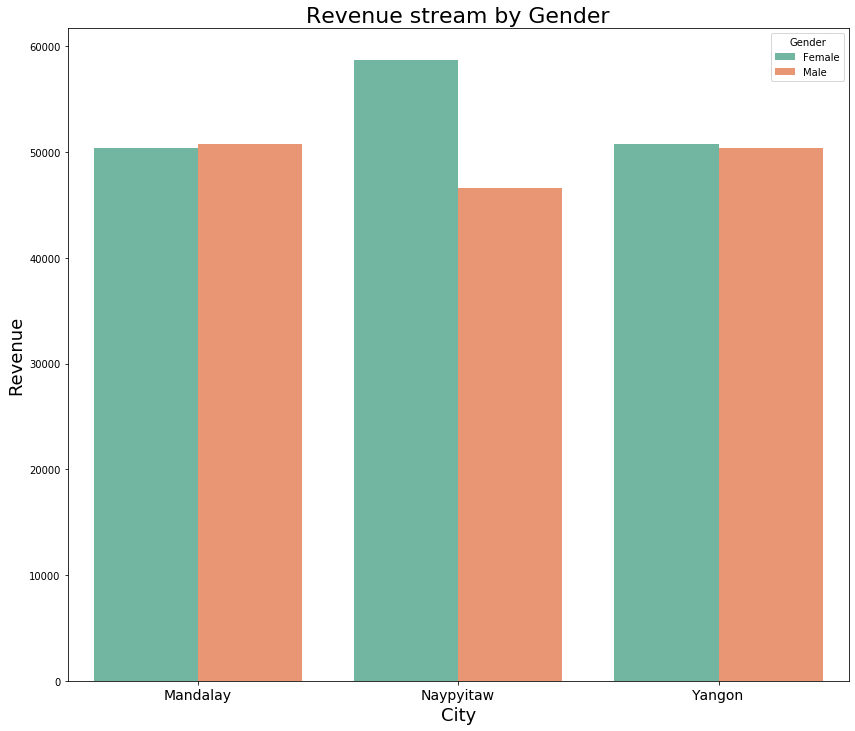

In [103]:
# Revenue generated from Male and Female on per city bases
plt.figure(figsize=(14,12))
sns.barplot(x='City',y='revenue',hue='Gender',
           data= df_gen_grp, palette='Set2')
plt.title('Revenue stream by Gender',fontsize=22)
plt.xlabel('City',fontsize=18)
plt.ylabel('Revenue',fontsize=18)
plt.xticks(fontsize=14)

In [104]:
# Revenue  of  city  based on their product line
df_revenue= df[['City','Product_line','revenue']]
df_revenue_city=df_revenue.groupby(['City','Product_line'], as_index=False).sum()
df_revenue_city_piv=df_revenue_city.pivot(index='City',columns='Product_line')
df_revenue_city_piv

revenue                                         \
Product_line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                   16239.47            15631.73           14490.37   
Naypyitaw                  18065.69            20533.40           22635.10   
Yangon                     17444.87            15554.77           16345.81   

                                                                     
Product_line Health and beauty Home and lifestyle Sports and travel  
City                                                                 
Mandalay              19029.20           16713.49          19036.38  
Naypyitaw             15824.12           13233.86          15011.36  
Yangon                11997.86           21349.71          18450.19

In [105]:
# Average revenue  of  city  based on their product line
df_revenue= df[['City','Product_line','revenue']]
df_revenue_city=df_revenue.groupby(['City','Product_line'], as_index=False).mean()
df_revenue_city_piv=df_revenue_city.pivot(index='City',columns='Product_line')
df_revenue_city_piv

revenue                                         \
Product_line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                 295.263091          252.124677         289.807400   
Naypyitaw                328.467091          315.898462         342.956061   
Yangon                   290.747833          304.995490         281.824310   

                                                                     
Product_line Health and beauty Home and lifestyle Sports and travel  
City                                                                 
Mandalay            359.041509         334.269800        307.038387  
Naypyitaw           304.310000         294.085778        333.585778  
Yangon              255.273617         328.457077        312.715085

### Please feel free to comment and suggest further analysis I can do in the future. Peace